In [1]:
import numpy as np
import matplotlib.pyplot as plt

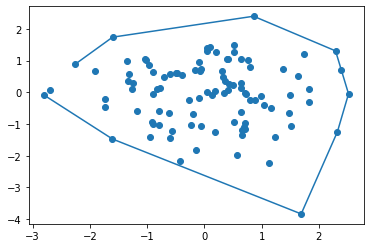

In [2]:
# for later to draw leaf margin in more complex shapes, without sorting all points
from scipy.spatial import ConvexHull

# RANDOM DATA
x = np.random.normal(0,1,100)
y = np.random.normal(0,1,100)
xy = np.hstack((x[:,np.newaxis],y[:,np.newaxis]))

# PERFORM CONVEX HULL
hull = ConvexHull(xy)

# PLOT THE RESULTS
plt.scatter(x,y)
plt.plot(x[hull.vertices], y[hull.vertices])
plt.show()

# General Approach
1. convergence points emerge when sufficient space becomes available between cp on cell margin (Hofmeister's rule).
    - create threshold paramter for when cp appear (th_cp)
    - for this measure red distance on leaf margin
    - new convergence points modify the biological composition and influence shap (hormones present and where to place the red line's new start point etc)
2. introduce new strand where cp is added
    - "portion of the margin falling within the threshold distance d_axes of the cp point are associated with the new veins"
    - this means that the next interval is split in two to decide when there will be a new cp where. (light green areas in figure 6.2 of Runions 2014 thesis)
3. veins grow in the direction they are pointing and take with them the nearest margin points
    - stretching and bending of margin are minimized, to avoid deformation of margin that occurs from vein growth
    - this damping of stretching is decided locally based on compounds in cells locally



<img src="img/LeafModelDefinition.png" alt="Leaf Visualization (Runions, 2014)" width="40%" height="40%">

# proof of concept approach:

Problem, the actual math results in approximately 3000 lines of code in C++, so that would def be overkill? Maybe try using parametric sliders in growth? Might even be more intuitive for technical artists. I'd say it's worth a try even though it's not very mathematically significant, but might be good enough for 3D production

## step 1 
- create basic leaf shape (can even be a circle), with primordium
- create test margin with 1cp
- create points on primordium

In [77]:
class Point:
    def __init__(self, pos, is_cp, vein_assoc, has_morphogen):
        self.pos = pos
        self.is_cp = is_cp
        self.vein_assoc = vein_assoc
        self.has_morphogen = has_morphogen

def print_points(points):    
    for i in range(0,len(points)):
        print(str(i) +"   " + ', '.join("%s: %s" % item for item in vars(points[i]).items())) #print class data

def get_points_pos(list_of_points):
    x_pos = []
    y_pos = []
    pos = []
    for point in list_of_points:
            pos.append(point.pos)
            x_pos.append(point.pos[0])
            y_pos.append(point.pos[1])
    return x_pos, y_pos, pos

def plot_leaf(all_veins, margin, all_cp):
    """Plots an image of the leaf's veins, convergence points and margin."""
    
    x_vein = []
    y_vein = []
    for vein in all_veins:
        temp_vein_pos = get_points_pos(vein)
        x_vein.append(temp_vein_pos[0])
        y_vein.append(temp_vein_pos[1])
    
    x_margin,y_margin, margin_pos = get_points_pos(margin)
    
    x_cp, y_cp, pos_cp = get_points_pos(all_cp)
    
    plt.plot(x_vein, y_vein, '-bo')
    plt.plot(x_margin, y_margin, '-ko')
    plt.plot(x_cp, y_cp, 'yo')
    plt.axis([-7, 7, 0, 7])
    plt.show()
    return temp_vein_pos[2], margin_pos 

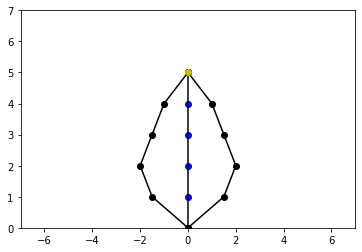

0   pos: [0, 0], is_cp: 0, vein_assoc: 0, has_morphogen: 0
1   pos: [-1.5, 1], is_cp: 0, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
2   pos: [-2, 2], is_cp: 0, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
3   pos: [-1.5, 3], is_cp: 0, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
4   pos: [-1, 4], is_cp: 0, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
5   pos: [0, 5], is_cp: 1, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
6   pos: [1, 4], is_cp: 0, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
7   pos: [1.5, 3], is_cp: 0, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
8   pos: [2, 2], is_cp: 0, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
9   pos: [1.5, 1], is_cp: 0, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
10

In [85]:
# initialize convergence points    
all_cp = []

# create primordium vein
base_point = Point([0,0], 0, 0, 0)
primordium_vein = [base_point]
has_morphogen = 0

for i in range(6):
    if i == 0: #skip base_point
        continue
    elif i == 5:
        is_cp = 1
        new_point = Point([0, i], is_cp, base_point, has_morphogen)
        all_cp.append(new_point)
    else:
        is_cp = 0
        new_point = Point([0, i], is_cp, base_point, has_morphogen)   
    primordium_vein.append(new_point)
    
# create margin
margin = []
width_points = [0,1.5, 2, 1.5,1,0]
for i in [-1,1]:
    for j in range(6):
        if j == 0:
            new_point = base_point
        elif j == 5:
            new_point = primordium_vein[-1]
        else:
            x = i * width_points[j] 
            is_cp = 0
            has_morphogen = 0
            new_point = Point([x, j], is_cp, base_point, has_morphogen)
        
        margin.append(new_point)
margin[6:11] = reversed(margin[6:11])  # Reverse, So margin is one continuous line

plot_leaf([primordium_vein], margin, all_cp)
# plt.show()

print_points(margin)

print_points(all_cp)

## step 2

- vein insertion (neirest neighbours sklearn? euclidean distance ?)

- create simple polar growth along vein axis
    - think about stretching, now or later?

0   pos: [0, 5], is_cp: 1, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0


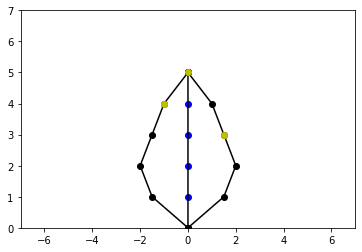

0   pos: [0, 5], is_cp: 1, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
1   pos: [-1, 4], is_cp: 1, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0
2   pos: [1.5, 3], is_cp: 1, vein_assoc: <__main__.Point object at 0x00000241388146D0>, has_morphogen: 0


3

In [86]:
# create new cp for vein insertion
# this is temporarily hard coded for poc, later done dynamically based on threshold during growth

print_points(all_cp)

margin[4].is_cp = 1
margin[7].is_cp = 1

all_cp.append(margin[4])
all_cp.append(margin[7])

primordium_vein_pos, margin_pos = plot_leaf([primordium_vein], margin, all_cp)

print_points(all_cp)

len(all_cp)

In [102]:
from sklearn.metrics.pairwise import euclidean_distances

def find_shortest_path(all_cp, vein):
    _,_, all_cp_pos = get_points_pos(all_cp)
    _, _, vein_pos = get_points_pos(vein)
#     margin_array = np.array(all_cp_pos)
#     primordium_array = np.array(primordium_vein_pos)
    euc_res = euclidean_distances(all_cp_pos, vein_pos)
    min_index = np.argmin(euc_res, axis=1)
    return min_index, euc_res

print(find_shortest_path(all_cp, primordium_vein)[0])
print(find_shortest_path(all_cp, primordium_vein)[1])

def connect_newcp( all_cp, veins):
    
    min_index, euc_res = find_shortest_path(all_cp, vein)

[5 4 3]
[[5.         4.         3.         2.         1.         0.        ]
 [4.12310563 3.16227766 2.23606798 1.41421356 1.         1.41421356]
 [3.35410197 2.5        1.80277564 1.5        1.80277564 2.5       ]]


In [66]:
# find nearest neighbour point on vein (choosing between veins won't be necessary due to cell splitting regions?) - DOUBLE CHECK ASSUMPTION
from sklearn.neighbors import KDTree
>>> import numpy as np
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> kdt = KDTree(X, leaf_size=30, metric='euclidean')
>>> kdt.query(X, k=2, return_distance=False)
array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]]...)

SyntaxError: invalid syntax (<ipython-input-66-9a5c8dd555fb>, line 3)

## step 3

- more complex growth methods both or choose 1?:
    - find path to closest vein -> the longer the travel the longer the auxin travels
    - expand according to morphogens -> expands more or indent at morphogen points 